In [1]:
train_and_save = True

# Import

### Librerie

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential, Model
from keras.layers import *
from sklearn.metrics import *
from keras.optimizers import Adam
from statsmodels.tsa.seasonal import seasonal_decompose
import keras.backend as K
from tensorflow import keras
from tensorflow.keras import layers
import time
from math import sqrt
import json
from efficientnet.tfkeras import EfficientNetB4

### Dataset

In [3]:
dataset = pd.read_csv('./dataset_fake.csv')

In [4]:
dataset[160:180]

,Unnamed: 0,user_id,date,sleepduration,bedin,bedout,awakeduration,timetosleep,remduration,deepduration,stepsgaitspeed,distancegaitspeed
160,160,0,160,6.29,23.32,6.47,0.45,0.41,1.01,0.63,98.37,4.19
161,161,0,161,5.65,24.09,6.82,0.50,0.58,1.13,0.79,95.33,4.86
162,162,0,162,7.56,23.99,8.45,0.42,0.48,1.81,0.53,94.62,4.32
163,163,0,163,8.11,24.37,9.59,0.60,0.51,1.30,1.05,94.16,4.53
164,164,0,164,8.22,23.04,8.15,0.43,0.46,1.40,0.49,95.65,4.61
165,165,0,165,6.45,25.49,8.92,0.53,0.45,1.16,0.52,95.69,4.26
166,166,0,166,9.53,22.53,9.14,0.50,0.58,1.91,1.33,97.34,4.68
167,167,0,167,8.65,24.29,10.05,0.63,0.48,1.73,0.52,93.79,4.30
168,168,0,168,9.80,23.72,10.55,0.53,0.50,1.47,0.59,96.32,4.39
169,169,0,169,5.51,25.21,7.99,0.54,0.73,0.88,0.50,100.04,4.22


In [5]:
# creo una lista di dataframe dove ogni elemento è l'insieme delle date per utente
utenti = []
# carico elenco utenti per scorrere tutti gli id
elenco_utenti = pd.read_csv('./userinfo.csv', usecols=['user_id', 'timezone', 'sex', 'age', 'height'])
elenco_utenti.head()

,user_id,timezone,sex,age,height
0,d9874c86e6db7bf4c3959445b0b05a1bb8e60bbf,UTC,Male,27,184
1,fe5d7aacd82682e68d94ea1e6aa33a1e858337f7,PDT,Female,39,175
2,88359b8e24f4d6b758fb4566860ba9842fc5b350,UTC,Male,26,179
3,e061ccf5eece921027f618686a5aa2412d753b6b,PDT,Female,27,169
4,2e88aac4e69049d0845a5e2dce661ae8f4f55239,UTC,Male,61,177


In [36]:
heights = elenco_utenti['height'].values
ages = elenco_utenti['age'].values

counter = 0
for i in range(len(heights)): 
    if heights[i] < 110 or heights[i] > 240:
        print('user:', i, 'height:', heights[i], 'age:', ages[i])
        counter += 1
print(f'su {len(heights)} utenti, {counter} hanno altezze insolite, cioè il {round(counter * 100 / len(heights), 2)}% degli utenti')

user: 88 height: 253 age: 62
user: 282 height: 3 age: 52
user: 551 height: 298 age: 36
user: 646 height: 109 age: 69
user: 718 height: 100 age: 52
user: 860 height: 248 age: 45
user: 929 height: 107 age: 74
user: 932 height: 257 age: 72
user: 966 height: 3 age: 33
user: 1071 height: 106 age: 28
user: 1305 height: 3 age: 37
user: 1647 height: 98 age: 61
user: 1907 height: 51 age: 8
user: 2110 height: 0 age: 34
user: 2656 height: 5 age: 37
user: 2715 height: 3 age: 52
user: 2828 height: 259 age: 66
user: 2936 height: 267 age: 48
user: 3021 height: 77 age: 46
user: 3228 height: 300 age: 31
user: 3539 height: 59 age: 37
user: 3596 height: 261 age: 54
user: 3918 height: 5 age: 54
user: 4112 height: -2 age: 29
user: 4411 height: 106 age: 51
user: 4449 height: 105 age: 28
user: 4645 height: 39 age: 72
user: 5074 height: 108 age: 57
user: 5128 height: 15 age: 30
user: 5289 height: 1 age: 63
user: 5372 height: 249 age: 32
user: 5438 height: 292 age: 30
user: 5991 height: 80 age: 26
user: 6014 h

In [37]:
counter = 0
for i in range(len(heights)): 
    if ages[i] < 5 or ages[i] > 100:
        print('user:', i, 'height:', heights[i], 'age:', ages[i])
        counter += 1
print(f'su {len(heights)} utenti, {counter} hanno età insolite, cioè il {round(counter * 100 / len(heights), 2)}% degli utenti')

user: 242 height: 169 age: 101
user: 834 height: 159 age: -49
user: 1213 height: 161 age: -1
user: 1648 height: 172 age: 1
user: 3008 height: 184 age: -1
user: 3059 height: 181 age: 1
user: 5090 height: 167 age: 2
user: 5949 height: 179 age: 115
user: 7071 height: 172 age: 1
user: 8384 height: 184 age: -1
user: 8814 height: 172 age: 0
su 11614 utenti, 11 hanno età insolite, cioè il 0.09% degli utenti


In [5]:
def check_if_normal(variable, variable_name):
    # Traccia l'istogramma
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(variable, bins=200, density=True, alpha=0.6, color='g')
    plt.title('Histogram - ' + variable_name)

    # Traccia il grafico Q-Q
    plt.subplot(1, 2, 2)
    stats.probplot(variable, dist="norm", plot=plt)
    plt.title('Q-Q Plot - ' + variable_name)

    plt.show()

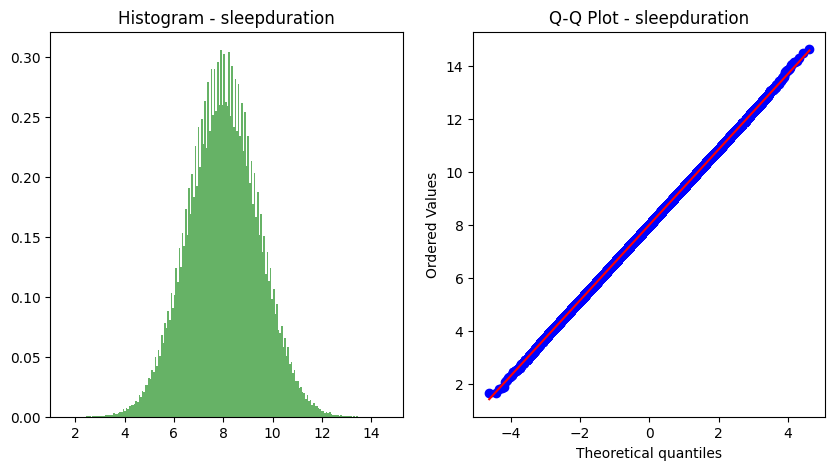

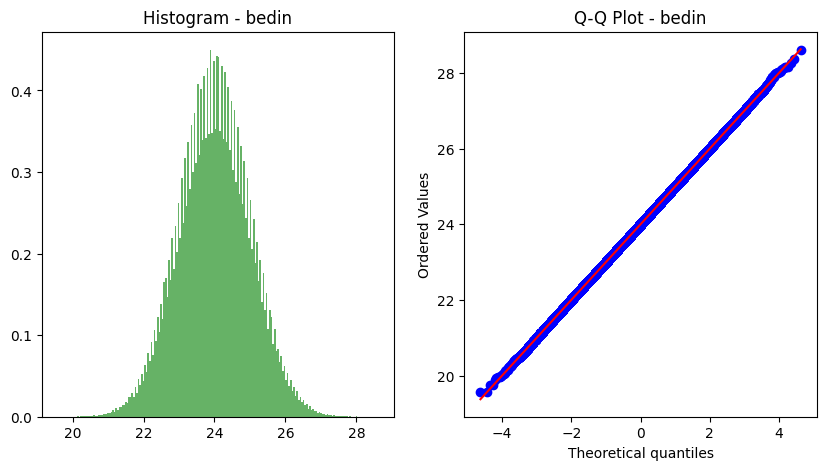

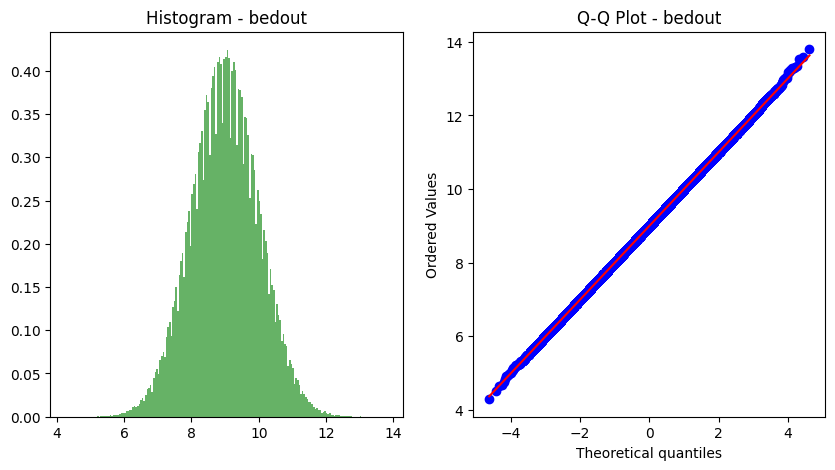

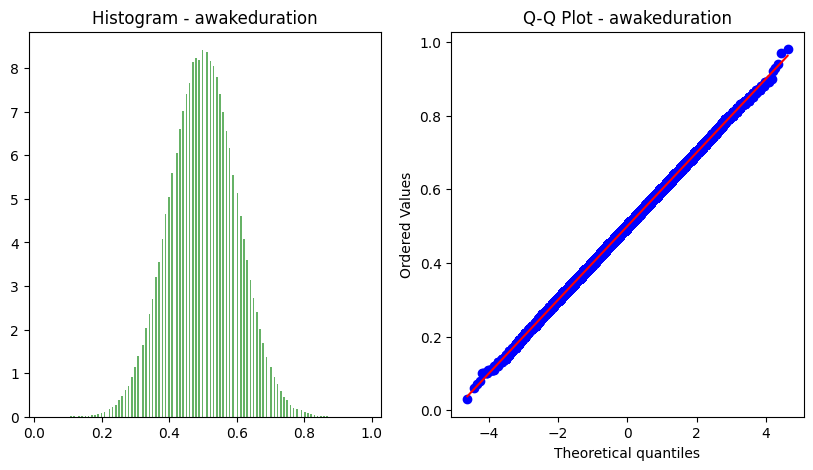

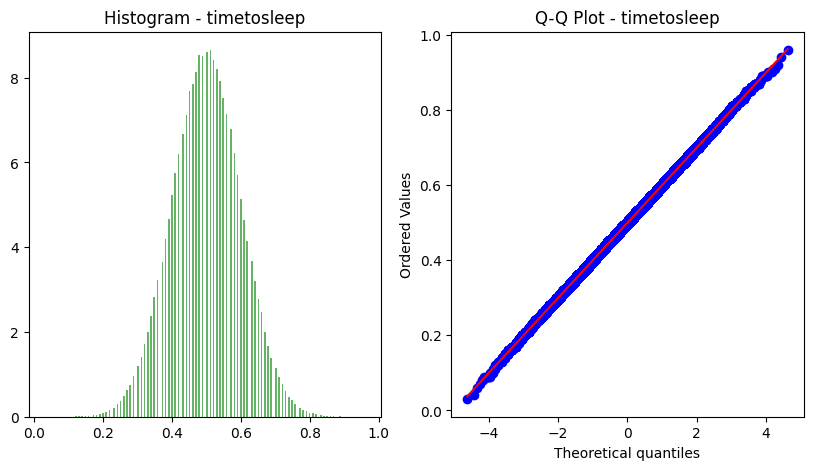

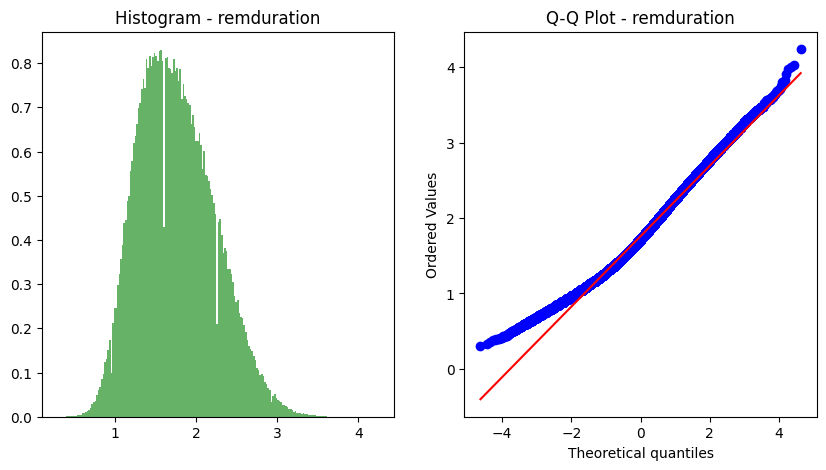

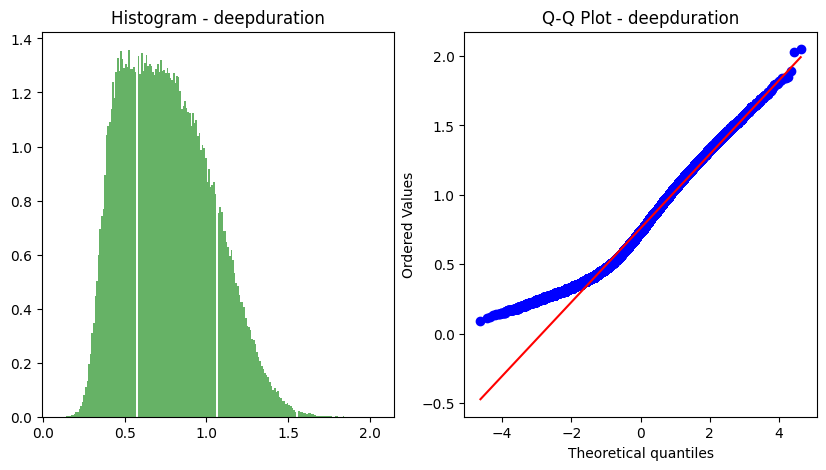

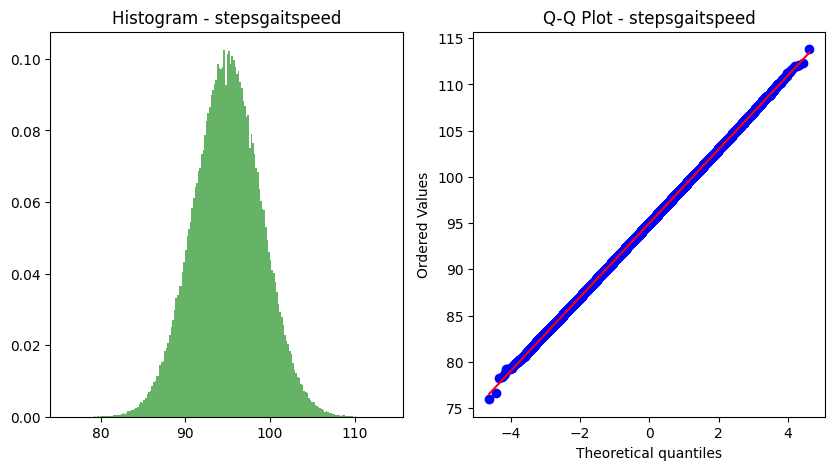

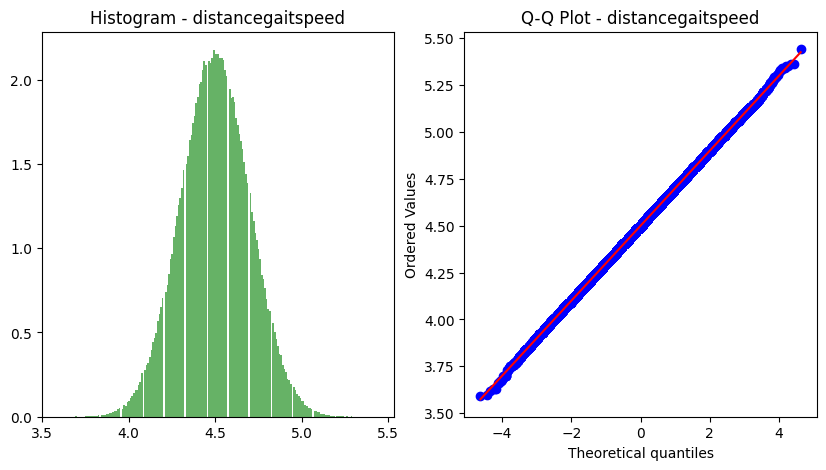

In [6]:
# sleepduration,bedin,bedout,awakeduration,timetosleep,remduration,deepduration,stepsgaitspeed,distancegaitspeed
check_if_normal(dataset['sleepduration'].values, 'sleepduration')
check_if_normal(dataset['bedin'].values, 'bedin')
check_if_normal(dataset['bedout'].values, 'bedout')
check_if_normal(dataset['awakeduration'].values, 'awakeduration')
check_if_normal(dataset['timetosleep'].values, 'timetosleep')
check_if_normal(dataset['remduration'].values, 'remduration')
check_if_normal(dataset['deepduration'].values, 'deepduration')
check_if_normal(dataset['stepsgaitspeed'].values, 'stepsgaitspeed')
check_if_normal(dataset['distancegaitspeed'].values, 'distancegaitspeed')


In [7]:
dataset.set_index(['user_id','date'], inplace=True)

In [11]:
def get_sleep_quality(timetosleep, sleepduration, bedin, bedout, awakeduration, remduration, deepduration):
    sleep_quality = 0
    if timetosleep > 0.25 and timetosleep <= 0.5:
        sleep_quality += 1
    elif timetosleep > 0.5 and timetosleep <= 1:
        sleep_quality += 2
    elif timetosleep > 1:
        sleep_quality += 3
    
    if sleepduration > 6 and sleepduration <= 7:
        sleep_quality += 1
    elif sleepduration > 5 and sleepduration <= 6:
        sleep_quality += 2
    elif sleepduration <= 5:
        sleep_quality += 3

    timeinbed = bedout + 24 - bedin
    sleep_efficiency = sleepduration / timeinbed

    if sleep_efficiency > 0.75 and sleep_efficiency <= 0.85:
        sleep_quality += 1
    elif sleep_efficiency > 0.65 and sleep_efficiency <= 0.75:
        sleep_quality += 2
    elif sleep_efficiency <= 0.65:
        sleep_quality += 3

    if awakeduration > 1/3 and awakeduration <= 0.5:
        sleep_quality += 1
    elif awakeduration > 0.5 and awakeduration <= 2/3:
        sleep_quality += 2
    elif awakeduration > 2/3:
        sleep_quality += 3

    percentage_deep = deepduration / sleepduration

    if percentage_deep <= 0.1:
        sleep_quality += 1

    percentage_rem = remduration / sleepduration

    if percentage_rem < 0.2 or percentage_rem > 0.25:
        sleep_quality += 1
    
    return sleep_quality


In [12]:
x = []
y = []
for index, series in dataset.iterrows():
    x.append(get_sleep_quality(series['timetosleep'], series['sleepduration'], series['bedin'], series['bedout'], series['awakeduration'], series['remduration'], series['deepduration']))
    y.append(series['stepsgaitspeed'])

In [13]:
n_train = (len(x) * 80) // 100

In [14]:
trainX = x[:n_train]
trainY = y[:n_train]
testX = x[n_train:]
testY = y[n_train:]

In [15]:
print(len(trainX), len(testX), len(trainY), len(testY))

print(trainX[0:10])
print('---')
print(trainY[0:10])

AttributeError: 'list' object has no attribute 'shape'

In [14]:
# features num
features_num = dataset.shape[1]
features_num

6

# Metriche

In [15]:
def metrics(model, trainX, trainY, testX, testY, history):
    
    # stampa metriche
    score_train = model.evaluate(trainX, trainY, verbose = 0)
    print("**********TRAIN-SET***********")
    print("MSE: {}".format(score_train[1]))
    print("RMSE: {}".format(sqrt(score_train[1])))
    print("MAE: {}".format(score_train[2]))
    
    score_test = model.evaluate(testX, testY, verbose = 0)
    print("**********TEST-SET***********")
    print("MSE: {}".format(score_test[1]))
    print("RMSE: {}".format(sqrt(score_test[1])))
    print("MAE: {}".format(score_test[2]))

    #plot predizioni
    prediction_test=model.predict(testX, verbose = 0)
    prediction_copies_test_array = np.repeat(prediction_test,features_num, axis=-1)
    pred_test=np.reshape(prediction_copies_test_array,(len(prediction_test),features_num))[:,col2pred]
    true_value_test_copies_array = np.repeat(testY,features_num, axis=-1)
    true_value_test=np.reshape(true_value_test_copies_array,(len(testY),features_num))[:,col2pred]
    
    plt.plot(true_value_test[:150], color='red', label='Real deep duration')
    plt.plot(pred_test[:150], color='blue', label='Predicted deep duration')
    plt.title('Deep duration Prediction')
    plt.xlabel('Time')
    plt.ylabel('Deep duration')
    plt.legend()
    plt.show()
    
    # plot andamento loss
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss (mse)')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # plot andamento loss
    plt.plot(history['mae'])
    plt.plot(history['val_mae'])
    plt.title('model mae')
    plt.ylabel('mae')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Data manipulation 

In [16]:
def values4metrics(model, trainX, trainY, testX, testY):
    prediction_train = model.predict(trainX)
    prediction_train_copies_array = np.repeat(prediction_train, features_num, axis=-1)
    pred_train = np.reshape(prediction_train_copies_array, (len(prediction_train), features_num))[:, col2pred]
    true_value_train_copies_array = np.repeat(trainY, features_num, axis=-1)
    true_value_train = np.reshape(true_value_train_copies_array, (len(trainY), features_num))[:, col2pred]

    prediction_test=model.predict(testX)
    prediction_copies_test_array = np.repeat(prediction_test,features_num, axis=-1)
    pred_test=np.reshape(prediction_copies_test_array,(len(prediction_test),features_num))[:,col2pred]
    true_value_test_copies_array = np.repeat(testY,features_num, axis=-1)
    true_value_test=np.reshape(true_value_test_copies_array,(len(testY),features_num))[:,col2pred]
    
    return true_value_train, pred_train, true_value_test, pred_test

# Architetture di supporto

In [17]:
class Time2Vec(Layer):

    def __init__(self, output_dimension=None, **kwargs):
        self.output_dimension = output_dimension
        super(Time2Vec, self).__init__(**kwargs)

    def get_config(self):
        config = super().get_config()
        config.update({
            "output_dimension": self.output_dimension,
        })
        return config

    def build(self, input_shape):

        self.W = self.add_weight(name='W',
                                shape=(input_shape[-1], self.output_dimension),
                                initializer='uniform',
                                trainable=True)

        self.P = self.add_weight(name='P',
                                shape=(input_shape[1], self.output_dimension),
                                initializer='uniform',
                                trainable=True)

        self.w = self.add_weight(name='w',
                                shape=(input_shape[1], 1),
                                initializer='uniform',
                                trainable=True)

        self.p = self.add_weight(name='p',
                                shape=(input_shape[1], 1),
                                initializer='uniform',
                                trainable=True)

        super(Time2Vec, self).build(input_shape)

    def call(self, x):

        original = self.w * x + self.p
        sin_trans = K.sin(K.dot(x, self.W) + self.P)

        return K.concatenate([sin_trans, original], -1)

In [18]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = keras.Input(shape=input_shape)
    time_embedding = Time2Vec(120)(inputs)
    #x = inputs
    x = time_embedding
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    
    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="tanh")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

input_shape = trainX.shape[1:]

model_transformer = build_model(input_shape, head_size=256, num_heads=2, ff_dim=4, num_transformer_blocks=2, mlp_units=[64], mlp_dropout=0.5, dropout=0.25)

model_transformer.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mse', 'mae'])

RuntimeError: Exception encountered when calling Time2Vec.call().

[1mCould not automatically infer the output shape / dtype of 'time2_vec' (of type Time2Vec). Either the `Time2Vec.call()` method is incorrect, or you need to implement the `Time2Vec.compute_output_spec() / compute_output_shape()` method. Error encountered:

module 'keras.backend' has no attribute 'sin'[0m

Arguments received by Time2Vec.call():
  • args=('<KerasTensor shape=(None, 7, 6), dtype=float32, sparse=None, name=keras_tensor>',)
  • kwargs=<class 'inspect._empty'>

In [19]:
model_transformer.summary()

NameError: name 'model_transformer' is not defined

# Funzione per richiamare i modelli

In [33]:
def model_recurrent(type = 'gru'):
    model = Sequential()
    
    if type == 'gru': # GRU
        model.add(GRU(256, return_sequences=True, input_shape=(window_size, features_num)))
        model.add(GRU(128, return_sequences=True))
        model.add(GRU(64))
        model.add(Dropout(0.25))
        model.add(Dense(32, activation='tanh'))
        model.add(Dropout(0.5))
        
    if type == 'lstm': # LSTM
        model.add(LSTM(256, return_sequences=True,input_shape=(window_size, features_num)))
        model.add(LSTM(128, return_sequences=True))
        model.add(LSTM(64))
        model.add(Dropout(0.25))
        model.add(Dense(32, activation='tanh'))
        model.add(Dropout(0.5))
    
    if type == 'bidirectional':  # Bidirectional
        model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(window_size,features_num)))
        model.add(Bidirectional(LSTM(128, return_sequences=True)))
        model.add(Bidirectional(LSTM(64)))
        model.add(Dropout(0.25))
        model.add(Dense(32, activation='tanh'))
        model.add(Dropout(0.5))   

    if type == 'time2vec':  # Time2Vec
        model.add(Input(shape=(window_size, features_num)))
        model.add(Time2Vec(120))
        model.add(LSTM(128, return_sequences=True))
        model.add(LSTM(64))
        model.add(Dropout(0.25))
        model.add(Dense(32, activation='tanh'))
        model.add(Dropout(0.5))  
        
    if type == 'cnn':  # CNN
        model.add(Conv1D(filters=128, kernel_size=2, activation='tanh', input_shape=(window_size,features_num)))
        model.add(Conv1D(filters=64, kernel_size=2, activation='tanh'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(RepeatVector(features_num))
        model.add(LSTM(units=100, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100))
        model.add(Dense(100, activation='tanh'))        

    model.add(Dense(1))
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mse', 'mae'])
    return model 

# Iperparametri

In [45]:
n_epoche = 50
batch = 4096 # 8192 - 4096

# GRU

In [50]:
model_gru = model_recurrent('gru')
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 7, 256)            202752    
                                                                 
 gru_7 (GRU)                 (None, 7, 128)            148224    
                                                                 
 gru_8 (GRU)                 (None, 64)                37248     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [51]:
if train_and_save == True:
    start = time.time()
    history_gru = model_gru.fit(trainX, trainY, epochs = n_epoche, verbose = 1, batch_size = batch, validation_split = 0.2) # 8192
    end = time.time()
    time_gru = end-start
    model_gru.save('./trained_model/DeepDuration/model_gru_e' + str(n_epoche) + "_b" + str(batch) + '.h5')
else:
    model_gru = keras.models.load_model('./trained_model/DeepDuration/model_gru_e' + str(n_epoche) + "_b" + str(batch) + '.h5') 

Epoch 1/50
161/161 [==============================] - 154s 927ms/step - loss: 0.0468 - mse: 0.0468 - mae: 0.1694 - val_loss: 0.0325 - val_mse: 0.0325 - val_mae: 0.1414
Epoch 2/50
161/161 [==============================] - 151s 940ms/step - loss: 0.0386 - mse: 0.0386 - mae: 0.1545 - val_loss: 0.0325 - val_mse: 0.0325 - val_mae: 0.1408
Epoch 3/50
161/161 [==============================] - 153s 951ms/step - loss: 0.0369 - mse: 0.0369 - mae: 0.1509 - val_loss: 0.0325 - val_mse: 0.0325 - val_mae: 0.1406
Epoch 4/50
161/161 [==============================] - 153s 952ms/step - loss: 0.0357 - mse: 0.0357 - mae: 0.1482 - val_loss: 0.0322 - val_mse: 0.0322 - val_mae: 0.1403
Epoch 5/50
161/161 [==============================] - 151s 940ms/step - loss: 0.0349 - mse: 0.0349 - mae: 0.1466 - val_loss: 0.0322 - val_mse: 0.0322 - val_mae: 0.1404
Epoch 6/50
161/161 [==============================] - 134s 832ms/step - loss: 0.0343 - mse: 0.0343 - mae: 0.1451 - val_loss: 0.0321 - val_mse: 0.0321 - val_mae:

c:\Users\ivanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# LSTM

In [52]:
model_lstm = model_recurrent('lstm')
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 256)            269312    
                                                                 
 lstm_1 (LSTM)               (None, 7, 128)            197120    
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [59]:
from tensorflow import config
config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [53]:
if train_and_save == True:
    start = time.time()
    history_lstm = model_lstm.fit(trainX, trainY, epochs = n_epoche, verbose = 1, batch_size = batch, validation_split = 0.2) # 8192
    end = time.time()
    time_lstm = end-start
    model_lstm.save('./trained_model/model_lstm_e' + str(n_epoche) + "_b" + str(batch) + '.h5')
else:
    model_lstm = keras.models.load_model('./trained_model/model_lstm_e' + str(n_epoche) + "_b" + str(batch) + '.h5') 

Epoch 1/50
 81/161 [==============>...............] - ETA: 1:17 - loss: 0.0517 - mse: 0.0517 - mae: 0.1786

KeyboardInterrupt: 

# Bidirectional - LSTM

In [27]:
model_bi = model_recurrent('bidirectional')
model_bi.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 7, 512)           538624    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 7, 256)           656384    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                      

In [28]:
if train_and_save == True:
    start = time.time()
    history_bi = model_bi.fit(trainX, trainY, epochs = n_epoche, verbose = 1, batch_size = batch, validation_split = 0.2) # 8192
    end = time.time()
    time_bi = end-start
    model_bi.save('./trained_model/model_bidirectional_e' + str(n_epoche) + "_b" + str(batch) + '.h5')
else:
    model_bi = keras.models.load_model('./trained_model/model_bidirectional_e' + str(n_epoche) + "_b" + str(batch) + '.h5') 

Epoch 1/50
161/161 [==============================] - 21s 75ms/step - loss: 0.0449 - mse: 0.0449 - mae: 0.1660 - val_loss: 0.0323 - val_mse: 0.0323 - val_mae: 0.1407
Epoch 2/50
161/161 [==============================] - 10s 63ms/step - loss: 0.0383 - mse: 0.0383 - mae: 0.1538 - val_loss: 0.0324 - val_mse: 0.0324 - val_mae: 0.1405
Epoch 3/50
161/161 [==============================] - 10s 63ms/step - loss: 0.0369 - mse: 0.0369 - mae: 0.1507 - val_loss: 0.0322 - val_mse: 0.0322 - val_mae: 0.1399
Epoch 4/50
161/161 [==============================] - 10s 63ms/step - loss: 0.0357 - mse: 0.0357 - mae: 0.1481 - val_loss: 0.0322 - val_mse: 0.0322 - val_mae: 0.1405
Epoch 5/50
161/161 [==============================] - 10s 63ms/step - loss: 0.0349 - mse: 0.0349 - mae: 0.1464 - val_loss: 0.0321 - val_mse: 0.0321 - val_mae: 0.1398
Epoch 6/50
161/161 [==============================] - 10s 63ms/step - loss: 0.0342 - mse: 0.0342 - mae: 0.1449 - val_loss: 0.0322 - val_mse: 0.0322 - val_mae: 0.1400
Epoc

# Time2Vec - LSTM

In [29]:
model_t2v = model_recurrent('time2vec')
model_t2v.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time2_vec (Time2Vec)        (None, 7, 126)            1574      
                                                                 
 lstm_6 (LSTM)               (None, 7, 128)            130560    
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [30]:
if train_and_save == True:
    start = time.time()
    history_t2v = model_t2v.fit(trainX, trainY, epochs = n_epoche, verbose = 1, batch_size = batch, validation_split = 0.2) # 8192
    end = time.time()
    time_t2v = end-start
    model_t2v.save('./trained_model/model_time2vec_e' + str(n_epoche) + "_b" + str(batch) + '.h5')
else:
    model_t2v = keras.models.load_model('./trained_model/model_time2vec_e' + str(n_epoche) + "_b" + str(batch) + '.h5', custom_objects={'Time2Vec': Time2Vec})

Epoch 1/50
161/161 [==============================] - 7s 21ms/step - loss: 0.0475 - mse: 0.0475 - mae: 0.1709 - val_loss: 0.0326 - val_mse: 0.0326 - val_mae: 0.1412
Epoch 2/50
161/161 [==============================] - 2s 15ms/step - loss: 0.0386 - mse: 0.0386 - mae: 0.1545 - val_loss: 0.0327 - val_mse: 0.0327 - val_mae: 0.1410
Epoch 3/50
161/161 [==============================] - 2s 15ms/step - loss: 0.0372 - mse: 0.0372 - mae: 0.1514 - val_loss: 0.0323 - val_mse: 0.0323 - val_mae: 0.1408
Epoch 4/50
161/161 [==============================] - 2s 15ms/step - loss: 0.0361 - mse: 0.0361 - mae: 0.1490 - val_loss: 0.0325 - val_mse: 0.0325 - val_mae: 0.1406
Epoch 5/50
161/161 [==============================] - 2s 15ms/step - loss: 0.0352 - mse: 0.0352 - mae: 0.1471 - val_loss: 0.0322 - val_mse: 0.0322 - val_mae: 0.1402
Epoch 6/50
161/161 [==============================] - 2s 15ms/step - loss: 0.0345 - mse: 0.0345 - mae: 0.1456 - val_loss: 0.0322 - val_mse: 0.0322 - val_mae: 0.1399
Epoch 7/50

# CNN - LSTM

In [31]:
model_cnn = model_recurrent('cnn')
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 6, 128)            1664      
                                                                 
 conv1d_9 (Conv1D)           (None, 5, 64)             16448     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 6, 128)           0         
 )                                                               
                                                                 
 lstm_8 (LSTM)               (None, 6, 100)           

In [32]:
if train_and_save == True:
    start = time.time()
    history_cnn = model_cnn.fit(trainX, trainY, epochs = n_epoche, verbose = 1, batch_size = batch, validation_split = 0.2) # 8192
    end = time.time()
    time_cnn = end-start
    model_cnn.save('./trained_model/model_cnn_e' + str(n_epoche) + "_b" + str(batch) + '.h5')
else:
    model_cnn = keras.models.load_model('./trained_model/model_cnn_e' + str(n_epoche) + "_b" + str(batch) + '.h5')

Epoch 1/50
161/161 [==============================] - 8s 27ms/step - loss: 0.0366 - mse: 0.0366 - mae: 0.1499 - val_loss: 0.0329 - val_mse: 0.0329 - val_mae: 0.1427
Epoch 2/50
161/161 [==============================] - 3s 19ms/step - loss: 0.0333 - mse: 0.0333 - mae: 0.1432 - val_loss: 0.0329 - val_mse: 0.0329 - val_mae: 0.1423
Epoch 3/50
161/161 [==============================] - 3s 20ms/step - loss: 0.0332 - mse: 0.0332 - mae: 0.1430 - val_loss: 0.0342 - val_mse: 0.0342 - val_mae: 0.1459
Epoch 4/50
161/161 [==============================] - 3s 19ms/step - loss: 0.0332 - mse: 0.0332 - mae: 0.1429 - val_loss: 0.0328 - val_mse: 0.0328 - val_mae: 0.1411
Epoch 5/50
161/161 [==============================] - 3s 19ms/step - loss: 0.0332 - mse: 0.0332 - mae: 0.1428 - val_loss: 0.0333 - val_mse: 0.0333 - val_mae: 0.1435
Epoch 6/50
161/161 [==============================] - 3s 19ms/step - loss: 0.0332 - mse: 0.0332 - mae: 0.1428 - val_loss: 0.0326 - val_mse: 0.0326 - val_mae: 0.1407
Epoch 7/50

# T2V - Transformer 

In [62]:
model_transformer.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 7, 6)]       0           []                               
                                                                                                  
 time2_vec_11 (Time2Vec)        (None, 7, 126)       1574        ['input_12[0][0]']               
                                                                                                  
 layer_normalization_74 (LayerN  (None, 7, 126)      252         ['time2_vec_11[0][0]']           
 ormalization)                                                                                    
                                                                                                  
 multi_head_attention_37 (Multi  (None, 7, 126)      259710      ['layer_normalization_74[0

In [63]:
if train_and_save == True:
    start = time.time()
    history_t= model_transformer.fit(trainX, trainY, epochs = n_epoche, verbose = 1, batch_size = batch, validation_split = 0.2) # 8192
    end = time.time()
    time_t = end-start
    model_transformer.save('./trained_model/model_transformer_e' + str(n_epoche) + "_b" + str(batch) + '.h5')
else:
    model_transformer = keras.models.load_model('./trained_model/model_transformer_e' + str(n_epoche) + "_b" + str(batch) + '.h5', custom_objects={'Time2Vec': Time2Vec})

Epoch 1/50
161/161 [==============================] - 16s 81ms/step - loss: 0.0456 - mse: 0.0456 - mae: 0.1654 - val_loss: 0.0324 - val_mse: 0.0324 - val_mae: 0.1401
Epoch 2/50
161/161 [==============================] - 13s 78ms/step - loss: 0.0361 - mse: 0.0361 - mae: 0.1493 - val_loss: 0.0321 - val_mse: 0.0321 - val_mae: 0.1402
Epoch 3/50
161/161 [==============================] - 12s 75ms/step - loss: 0.0356 - mse: 0.0356 - mae: 0.1481 - val_loss: 0.0329 - val_mse: 0.0329 - val_mae: 0.1430
Epoch 4/50
161/161 [==============================] - 12s 77ms/step - loss: 0.0351 - mse: 0.0351 - mae: 0.1471 - val_loss: 0.0329 - val_mse: 0.0329 - val_mae: 0.1427
Epoch 5/50
161/161 [==============================] - 12s 74ms/step - loss: 0.0348 - mse: 0.0348 - mae: 0.1463 - val_loss: 0.0320 - val_mse: 0.0320 - val_mae: 0.1401
Epoch 6/50
161/161 [==============================] - 12s 75ms/step - loss: 0.0344 - mse: 0.0344 - mae: 0.1455 - val_loss: 0.0319 - val_mse: 0.0319 - val_mae: 0.1396
Epoc

161/161 [==============================] - 12s 75ms/step - loss: 0.0324 - mse: 0.0324 - mae: 0.1409 - val_loss: 0.0321 - val_mse: 0.0321 - val_mae: 0.1404


In [64]:
print(time_t) 

604.433164358139


##### Salva i tempi di allenamento

In [69]:
if train_and_save == True:
    dictionary = {
        "gru": time_gru,
        "lstm": time_lstm,
        "bidirectional": time_bi,
        "time2vec": time_t2v,
        "cnn": time_cnn,
        "transformer": time_t
    }

    with open("./trained_model/training_times.json", "w") as outfile:
        json.dump(dictionary, outfile)
        
        
        
with open("./trained_model/training_times.json", 'r') as openfile:
    dict_times = json.load(openfile)

In [36]:
if train_and_save == True:
    dictionary = {
        "gru": history_gru.history,
        "lstm": history_lstm.history,
        "bidirectional": history_bi.history,
        "time2vec": history_t2v.history,
        "cnn": history_cnn.history,
        "transformer": history_t.history
    }

    with open("./trained_model/training_histories.json", "w") as outfile:
        json.dump(dictionary, outfile)
        
        
with open("./trained_model/training_histories.json", 'r') as openfile:
    dict_histories = json.load(openfile)

# Plot

--- GRU ---

Time: 200.5372166633606
**********TRAIN-SET***********
MSE: 0.03204754739999771
RMSE: 0.17901828789259971
MAE: 0.1398272067308426
**********TEST-SET***********
MSE: 0.0320134162902832
RMSE: 0.17892293394163647
MAE: 0.13993653655052185


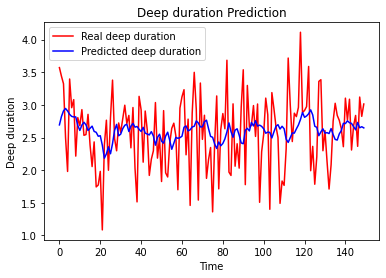

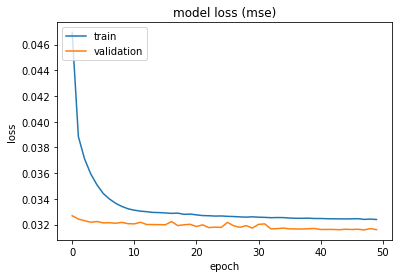

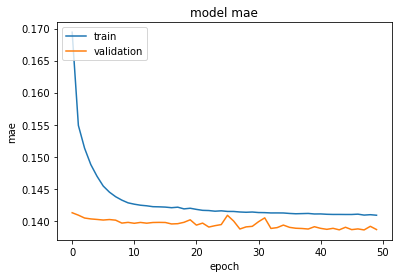

In [37]:
print("--- GRU ---\n\nTime: " + str(dict_times['gru']))
metrics(model_gru, trainX, trainY, testX, testY, dict_histories['gru'])

--- LSTM ---

Time: 224.2295265197754
**********TRAIN-SET***********
MSE: 0.032095011323690414
RMSE: 0.17915080609277317
MAE: 0.14006805419921875
**********TEST-SET***********
MSE: 0.03206949681043625
RMSE: 0.17907958233823376
MAE: 0.14014847576618195


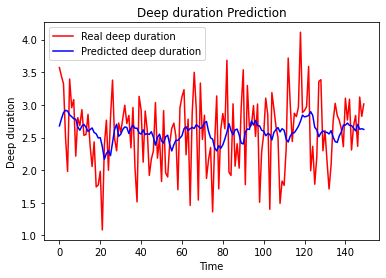

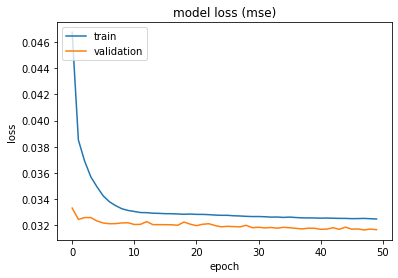

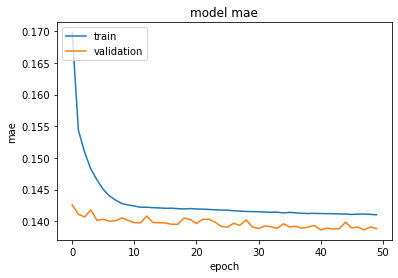

In [38]:
print("--- LSTM ---\n\nTime: " + str(dict_times['lstm']))
metrics(model_lstm, trainX, trainY, testX, testY, dict_histories['lstm'])

--- Bidirectional ---

Time: 515.7144947052002
**********TRAIN-SET***********
MSE: 0.0320727564394474
RMSE: 0.1790886831696727
MAE: 0.1399395912885666
**********TEST-SET***********
MSE: 0.03207666054368019
RMSE: 0.17909958275685678
MAE: 0.140134796500206


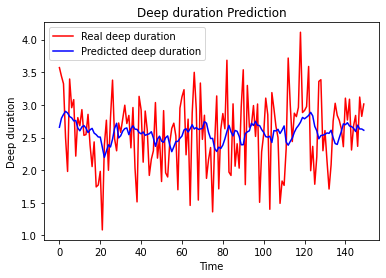

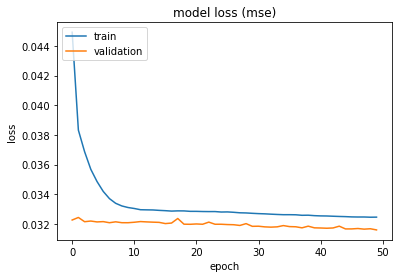

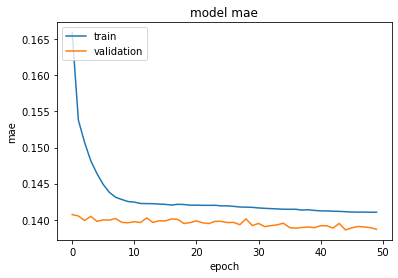

In [39]:
print("--- Bidirectional ---\n\nTime: " + str(dict_times['bidirectional']))
metrics(model_bi, trainX, trainY, testX, testY, dict_histories['bidirectional'])

--- Time2Vec - LSTM ---

Time: 124.24958610534668
**********TRAIN-SET***********
MSE: 0.03220032528042793
RMSE: 0.17944449080545197
MAE: 0.1405671238899231
**********TEST-SET***********
MSE: 0.03218967467546463
RMSE: 0.17941481175049243
MAE: 0.1406337469816208


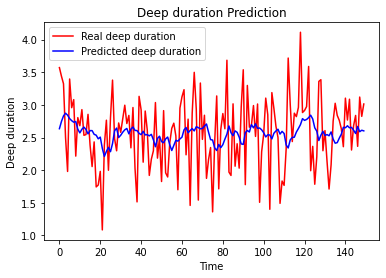

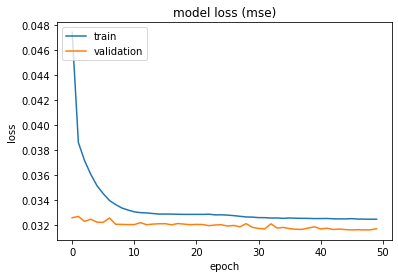

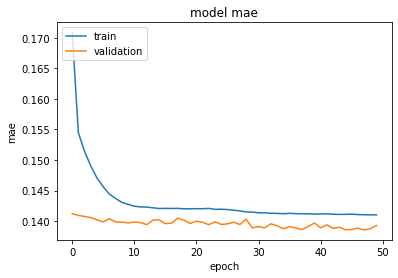

In [40]:
print("--- Time2Vec - LSTM ---\n\nTime: " + str(dict_times['time2vec']))
metrics(model_t2v, trainX, trainY, testX, testY, dict_histories['time2vec'])

--- CNN - LSTM ---

Time: 161.21596097946167
**********TRAIN-SET***********
MSE: 0.03259768337011337
RMSE: 0.18054828542557078
MAE: 0.14140097796916962
**********TEST-SET***********
MSE: 0.032791588455438614
RMSE: 0.18108447878114406
MAE: 0.1419740915298462


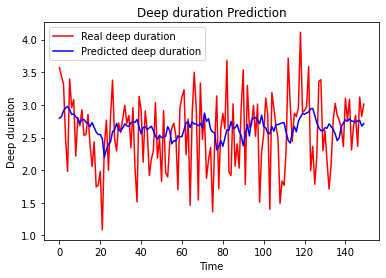

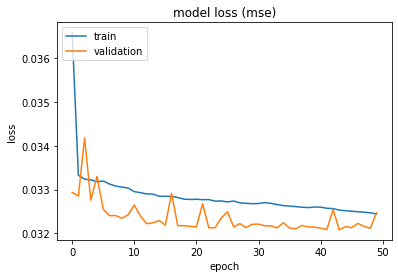

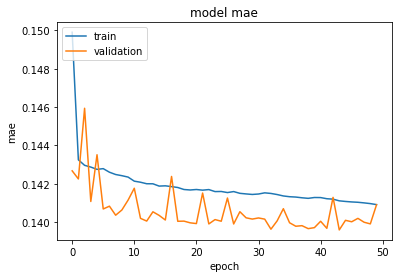

In [41]:
print("--- CNN - LSTM ---\n\nTime: " + str(dict_times['cnn']))
metrics(model_cnn, trainX, trainY, testX, testY, dict_histories['cnn'])

--- Transformer ---

Time: 604.433164358139
**********TRAIN-SET***********
MSE: 0.03247050940990448
RMSE: 0.18019575302959967
MAE: 0.1413474828004837
**********TEST-SET***********
MSE: 0.0323372446000576
RMSE: 0.1798255949526029
MAE: 0.14110593497753143


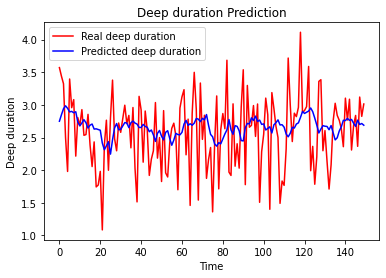

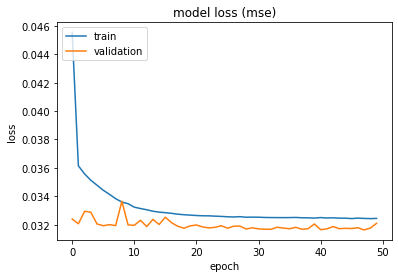

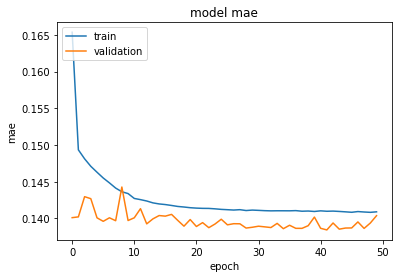

In [66]:
print("--- Transformer ---\n\nTime: " + str(time_t))
metrics(model_transformer, trainX, trainY, testX, testY, history_t.history)

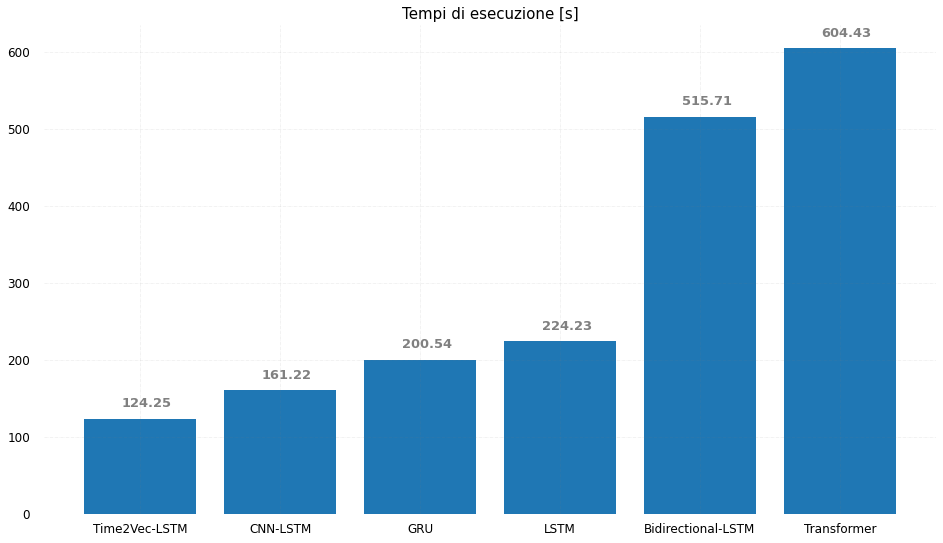

In [125]:
price = [dict_times['time2vec'], dict_times['cnn'], dict_times['gru'], dict_times['lstm'], dict_times['bidirectional'],   time_t]
name = ['Time2Vec-LSTM',  'CNN-LSTM', 'GRU', 'LSTM', 'Bidirectional-LSTM', 'Transformer']
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.bar(name, price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_x()+0.27, i.get_height()+15,
             str(round((i.get_height()), 2)),
             fontsize = 13, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Tempi di esecuzione [s]',
             loc ='center', fontsize = 15)
plt.rcParams.update({'font.size': 12})
# Show Plot
plt.show()